In [29]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed




Beta from formula:  0.3428
Beta from Linear Regression:  0.3428
Alpha:  -0.0040032412
Cost of Equity:  0.0364




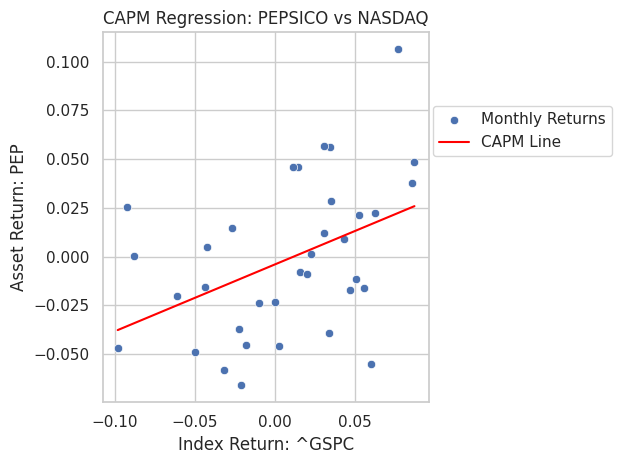

In [28]:
def CAPM(ticker_i, ticker_a, ticker_rf, start, end):
    # Download monthly closing prices
    index = yf.download(ticker_i, start=start, end=end)['Close']
    asset = yf.download(ticker_a, start=start, end=end)['Close']
    treas = yf.download(ticker_rf, start=start, end=end)['Close']

    # Resample to monthly data
    index = index.resample('ME').last()
    asset = asset.resample('ME').last()
    treas = treas.resample('ME').last()/100

    # Combine into one DataFrame
    asset = asset[ticker_a]
    index = index[ticker_i]
    treas = treas[ticker_rf]
    data = pd.DataFrame({'I_Close': index, 'A_Close': asset, 'Rf_Close': treas})
    data[['I_Return', 'A_Return']] = np.log(data[['I_Close', 'A_Close']] / data[['I_Close', 'A_Close']].shift(1))
    data.dropna(inplace=True)

    # Beta via formula
    beta_form = data[['I_Return', 'A_Return']].cov().iloc[0,1] / data['I_Return'].var()

    # Beta via regression
    beta_reg, alpha = np.polyfit(data['I_Return'], data['A_Return'], deg=1)

    # Cost of Equity Calculation
    R_m = data['I_Return'].median()
    R_f = data['Rf_Close'].median()
    cost_equity = R_f + beta_reg * (R_m - R_f)

    # Print results
    print('\n')
    print('Beta from formula: ', round(beta_form, 4))
    print('Beta from Linear Regression: ', round(beta_reg, 4))
    print('Alpha: ', round(alpha, 10))
    print('Cost of Equity: ', round(cost_equity, 4))
    print('\n')

    # Plot
    sns.set(style="whitegrid")
    sns.scatterplot(x='I_Return', y='A_Return', data=data, label='Monthly Returns')
    x_vals = np.sort(data['I_Return'])
    y_vals = alpha + beta_reg * x_vals
    sns.lineplot(x=x_vals, y=y_vals, color='red', label='CAPM Line')

    plt.xlabel(f'Index Return: {ticker_i}')
    plt.ylabel(f'Asset Return: {ticker_a}')
    plt.title(f'CAPM Regression: PEPSICO vs NASDAQ')
    plt.legend(bbox_to_anchor=(1.01, 0.8), loc=2, borderaxespad=0)
    plt.tight_layout()
    plt.show()

# Usage
ticker_a = 'PEP'
ticker_i = '^GSPC'
ticker_rf = '^IRX'
start = pd.to_datetime('2022-01-01')
end = pd.to_datetime('2024-12-31')

CAPM(ticker_i, ticker_a, ticker_rf, start, end)


